In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import chess
import chess.pgn

4

In [202]:
def cnt(current_game, current_color):
    moves = 1
    current_game = current_game.next()
    if current_color == 'black':
        current_game = current_game.next()
        moves += 1
    while True:
        
        if current_game.next() is None:
            break
        current_game = current_game.next()
        if current_game.next() is None:
            break
        current_game = current_game.next()
        moves += 1
    return moves

In [204]:
pgn = open('Carlsen.pgn')
name = 'Carlsen'
j = 0
Max = 0
while True:
        #print(j, "<-----")
        current_game = chess.pgn.read_game(pgn)
        
        
        if current_game is None:
            break
        current_color = 'black'
        
        headers = current_game.headers
        if name in headers.get("White", "?"):
            current_color = 'white'
        Max = max(Max, cnt(current_game, current_color))
        j += 1
        if j >= 2100:
            break
print(Max)

175


In [160]:
current_game = current_game.next()


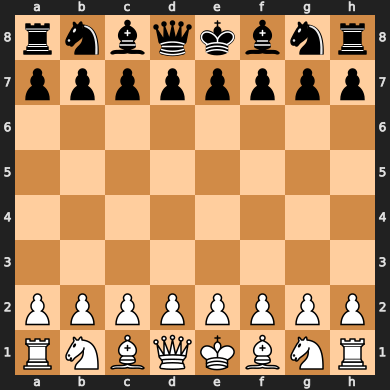

In [171]:
current_game.board()

In [94]:
current_game.san()

'Bxd3'

In [273]:
def get_feat(current_game, current_color):
    white = True
    black = False
    
    if current_color == 'white':
        color = white
    else:
        color = black
        
    board = current_game.board()
    SAN = current_game.san()
    MOVE = current_game.move.uci()
    Type = 1
    move = MOVE[2] + MOVE[3]
    if 'N' in SAN:
        Type = 2
        
    if 'B' in SAN:
        Type = 3
    if 'R' in SAN:
        Type = 4
    if 'Q' in SAN:
        Type = 5
    if 'K' in SAN:
        Type = 6
    if SAN == 'O-O':
        Type = 6
        if color == True:
            move = 'g1'
        else:
            move = 'g8'
    if SAN == 'O-O-O':
        Type = 6
        if color == True:
            move = 'c1'
        else:
            move = 'c8'
    
    is_capt = 0
    if 'x' in SAN:
        is_capt = 1
    
    is_check = 0
    if '+' in SAN:
        is_check = 1
    return [Type, chess.parse_square(move), is_capt, is_check]


In [274]:
def create_features(current_game, current_color):
    data = list()
    moves = 1
    current_game = current_game.next()
    if current_color == 'black':
        current_game = current_game.next()
        moves += 1
    while True:
        data += get_feat(current_game, current_color)
        if current_game.next() is None:
            break
        current_game = current_game.next()
        if current_game.next() is None:
            break
        current_game = current_game.next()
        moves += 1
    return data

In [186]:
def create_data_features(name):
    
    pgn = open(name + '.pgn')
    df = pd.DataFrame()
    j = 0
    while True:
        print(j, "<-----")
        current_game = chess.pgn.read_game(pgn)
        
        
        if current_game is None:
            break
        current_color = 'black'
        
        headers = current_game.headers
        if name in headers.get("White", "?"):
            current_color = 'white'
        cur_f = create_features(current_game, current_color)
        df = pd.concat([df, pd.DataFrame(cur_f).T])
        j += 1
        if j >= 2100:
            break
    return df

In [278]:
Carlsen = create_data_features('Carlsen')

0 <-----
1 <-----
2 <-----
3 <-----
4 <-----
5 <-----
6 <-----
7 <-----
8 <-----
9 <-----
10 <-----
11 <-----
12 <-----
13 <-----
14 <-----
15 <-----
16 <-----
17 <-----
18 <-----
19 <-----
20 <-----
21 <-----
22 <-----
23 <-----
24 <-----
25 <-----
26 <-----
27 <-----
28 <-----
29 <-----
30 <-----
31 <-----
32 <-----
33 <-----
34 <-----
35 <-----
36 <-----
37 <-----
38 <-----
39 <-----
40 <-----
41 <-----
42 <-----
43 <-----
44 <-----
45 <-----
46 <-----
47 <-----
48 <-----
49 <-----
50 <-----
51 <-----
52 <-----
53 <-----
54 <-----
55 <-----
56 <-----
57 <-----
58 <-----
59 <-----
60 <-----
61 <-----
62 <-----
63 <-----
64 <-----
65 <-----
66 <-----
67 <-----
68 <-----
69 <-----
70 <-----
71 <-----
72 <-----
73 <-----
74 <-----
75 <-----
76 <-----
77 <-----
78 <-----
79 <-----
80 <-----
81 <-----
82 <-----
83 <-----
84 <-----
85 <-----
86 <-----
87 <-----
88 <-----
89 <-----
90 <-----
91 <-----
92 <-----
93 <-----
94 <-----
95 <-----
96 <-----
97 <-----
98 <-----
99 <-----
100 <-----

755 <-----
756 <-----
757 <-----
758 <-----
759 <-----
760 <-----
761 <-----
762 <-----
763 <-----
764 <-----
765 <-----
766 <-----
767 <-----
768 <-----
769 <-----
770 <-----
771 <-----
772 <-----
773 <-----
774 <-----
775 <-----
776 <-----
777 <-----
778 <-----
779 <-----
780 <-----
781 <-----
782 <-----
783 <-----
784 <-----
785 <-----
786 <-----
787 <-----
788 <-----
789 <-----
790 <-----
791 <-----
792 <-----
793 <-----
794 <-----
795 <-----
796 <-----
797 <-----
798 <-----
799 <-----
800 <-----
801 <-----
802 <-----
803 <-----
804 <-----
805 <-----
806 <-----
807 <-----
808 <-----
809 <-----
810 <-----
811 <-----
812 <-----
813 <-----
814 <-----
815 <-----
816 <-----
817 <-----
818 <-----
819 <-----
820 <-----
821 <-----
822 <-----
823 <-----
824 <-----
825 <-----
826 <-----
827 <-----
828 <-----
829 <-----
830 <-----
831 <-----
832 <-----
833 <-----
834 <-----
835 <-----
836 <-----
837 <-----
838 <-----
839 <-----
840 <-----
841 <-----
842 <-----
843 <-----
844 <-----
845 <-----

1461 <-----
1462 <-----
1463 <-----
1464 <-----
1465 <-----
1466 <-----
1467 <-----
1468 <-----
1469 <-----
1470 <-----
1471 <-----
1472 <-----
1473 <-----
1474 <-----
1475 <-----
1476 <-----
1477 <-----
1478 <-----
1479 <-----
1480 <-----
1481 <-----
1482 <-----
1483 <-----
1484 <-----
1485 <-----
1486 <-----
1487 <-----
1488 <-----
1489 <-----
1490 <-----
1491 <-----
1492 <-----
1493 <-----
1494 <-----
1495 <-----
1496 <-----
1497 <-----
1498 <-----
1499 <-----
1500 <-----
1501 <-----
1502 <-----
1503 <-----
1504 <-----
1505 <-----
1506 <-----
1507 <-----
1508 <-----
1509 <-----
1510 <-----
1511 <-----
1512 <-----
1513 <-----
1514 <-----
1515 <-----
1516 <-----
1517 <-----
1518 <-----
1519 <-----
1520 <-----
1521 <-----
1522 <-----
1523 <-----
1524 <-----
1525 <-----
1526 <-----
1527 <-----
1528 <-----
1529 <-----
1530 <-----
1531 <-----
1532 <-----
1533 <-----
1534 <-----
1535 <-----
1536 <-----
1537 <-----
1538 <-----
1539 <-----
1540 <-----
1541 <-----
1542 <-----
1543 <-----
1544

In [2]:
C_df = pd.read_csv("CarlsenSAN.csv")
Kasparov = pd.read_csv("KasparovSAN.csv")

In [10]:
C_DF = C_df


In [4]:
K_df = Kasparov.fillna(0)

In [6]:
C_df.shape

(2100, 474)

In [8]:
K_df.shape

(2100, 474)

In [11]:
K_df['Name'] = 'Kasparov'
C_DF['Name'] = 'Carlsen'

In [306]:
C_DF.to_csv("CarlsenSAN.csv")

In [12]:
data = pd.concat([K_df, C_DF])

In [14]:
data = data.drop(['Unnamed: 0'], axis=1)

In [15]:
data

0   1  2  3    4     5    6    7    8     9  ...  463  464  465  466   
0     1  34  0  0  2.0  45.0  0.0  0.0  2.0  35.0  ...  0.0  0.0  0.0  0.0  \
1     1  28  0  0  1.0  27.0  0.0  0.0  2.0  11.0  ...  0.0  0.0  0.0  0.0   
2     1  28  0  0  2.0  21.0  0.0  0.0  1.0  27.0  ...  0.0  0.0  0.0  0.0   
3     1  34  0  0  1.0  44.0  0.0  0.0  1.0  43.0  ...  0.0  0.0  0.0  0.0   
4     1  34  0  0  1.0  43.0  0.0  0.0  1.0  27.0  ...  0.0  0.0  0.0  0.0   
...  ..  .. .. ..  ...   ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
2095  1  35  0  0  1.0  42.0  0.0  0.0  2.0  45.0  ...  0.0  0.0  0.0  0.0   
2096  1  35  0  0  2.0  45.0  0.0  0.0  1.0  40.0  ...  0.0  0.0  0.0  0.0   
2097  1  28  0  0  1.0  27.0  0.0  0.0  2.0  18.0  ...  0.0  0.0  0.0  0.0   
2098  1  27  0  0  3.0  29.0  0.0  0.0  1.0  20.0  ...  0.0  0.0  0.0  0.0   
2099  1  36  0  0  2.0  42.0  0.0  0.0  3.0  34.0  ...  0.0  0.0  0.0  0.0   

      467  468  469  470  471      Name  
0     0.0  0.0  0.0  0.0  0.0  Kasparov  
1     0.0  0.0  0.0  0.0  0.0  Kasparov  
2     0.0  0.0  0.0  0.0  0.0  Kasparov  
3     0.0  0.0  0.0  0.0  0.0  Kasparov  
4     0.0  0.0  0.0  0.0  0.0  Kasparov  
...   ...  ...  ...  ...  ...       ...  
2095  0.0  0.0  0.0  0.0  0.0   Carlsen  
2096  0.0  0.0  0.0  0.0  0.0   Carlsen  
2097  0.0  0.0  0.0  0.0  0.0   Carlsen  
2098  0.0  0.0  0.0  0.0  0.0   Carlsen  
2099  0.0  0.0  0.0  0.0  0.0   Carlsen  

[4200 rows x 473 columns]

In [16]:
X = data.iloc[:,:-1].values
y = data['Name']

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.ensemble import GradientBoostingClassifier

In [20]:
from sklearn import model_selection

In [21]:
import matplotlib.pyplot as plt

In [22]:
classifiers = []

classifiers.append(('SGD', SGDClassifier(max_iter = 1200, tol = 1e-4)))
classifiers.append(('SVL', SVC(kernel = 'rbf', gamma=0.05, probability = True)))
classifiers.append(('RF', RandomForestClassifier(n_estimators=44, max_depth=13, random_state=3)))
classifiers.append(('AB', AdaBoostClassifier()))
classifiers.append(('DT', DecisionTreeClassifier()))
classifiers.append(('LR', LogisticRegression(solver = 'lbfgs', max_iter = 500, multi_class = 'auto')))
classifiers.append(('NB', GaussianNB()))
classifiers.append(('SVR', SVC(gamma = 2, C = 1.0)))
classifiers.append(('MLP', MLPClassifier(alpha = 0.01, max_iter = 200, solver = 'lbfgs', tol = 0.001)))
classifiers.append(('KNN', KNeighborsClassifier(3)))
classifiers.append(('QDA', QuadraticDiscriminantAnalysis()))
classifiers.append(('LDA', LinearDiscriminantAnalysis()))

In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [26]:
results = []
names = []
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    results.append(accuracy_score(y_pred, y_test))
    names.append(name)


C:\Users\ilyas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ilyas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ilyas\anaconda3\lib\site-packages\sklearn\discriminant_analysis.p

In [27]:
import seaborn as sns

In [ ]:
crdata = pd.DataFrame(data={'Names': names, 'Score': results})

<Axes: >

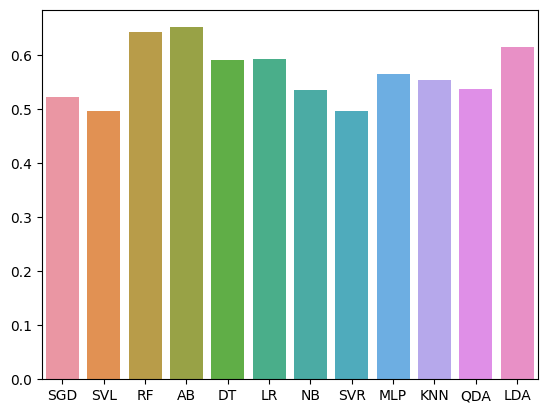

In [44]:
sns.barplot( x=names, y=results)